In [ ]:
!wget http://cb.lk/covid_19

--2020-07-02 21:37:18--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2020-07-02 21:37:19--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2020-07-02 21:37:20--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.67.1, 2620:100:6023:1::a27d:4301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.67.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2020-07-02 21:37:20--  https://www.dropbox.com/s/raw/7

In [ ]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [ ]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [ ]:
#CNN based model in keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)       

In [ ]:
#train it from scratch
train_datagen = image.ImageDataGenerator(
    rescale =1./255,
    shear_range= 0.2,
     zoom_range = 0.2,
     horizontal_flip = True,      
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
   'CovidDataset/Train',
   target_size = (224,224),
   batch_size = 32,
   class_mode = 'binary')


 


Found 224 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
validation_generator =test_dataset.flow_from_directory(
    'CovidDataset/Val',
   target_size = (224,224),
   batch_size = 32,
   class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [ ]:
hist = model.fit_generator(
   train_generator,
   steps_per_epoch=8,
   epochs=10,
   validation_data= validation_generator,
   validation_steps=2  
)

Epoch 1/10
8/8 [==============================] - 14s 2s/step - loss: 0.8496 - accuracy: 0.5039 - val_loss: 0.6856 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 10s 1s/step - loss: 0.5829 - accuracy: 0.6836 - val_loss: 0.4612 - val_accuracy: 0.9167
Epoch 3/10
8/8 [==============================] - 11s 1s/step - loss: 0.4421 - accuracy: 0.7656 - val_loss: 0.3314 - val_accuracy: 0.9500
Epoch 4/10
8/8 [==============================] - 11s 1s/step - loss: 0.3579 - accuracy: 0.8359 - val_loss: 0.3577 - val_accuracy: 0.9667
Epoch 5/10
8/8 [==============================] - 11s 1s/step - loss: 0.3356 - accuracy: 0.8516 - val_loss: 0.1942 - val_accuracy: 0.9667
Epoch 6/10
8/8 [==============================] - 11s 1s/step - loss: 0.2604 - accuracy: 0.8828 - val_loss: 0.1706 - val_accuracy: 0.9833
Epoch 7/10
8/8 [==============================] - 11s 1s/step - loss: 0.2011 - accuracy: 0.9180 - val_loss: 0.1212 - val_accuracy: 0.9667
Epoch 8/10
8/8 [==================

In [ ]:
model.save('model_adv.bs')

In [ ]:
model.evaluate_generator(train_generator)

[0.12065321207046509, 0.9419642686843872]

In [ ]:
model.evaluate_generator(validation_generator)

[0.1085035651922226, 0.9666666388511658]

In [ ]:
#test images
model = load_model('model_adv.bs')

In [ ]:
import os
train_generator.class_indices


{'Covid': 0, 'Normal': 1}

In [ ]:
y_actual =[]
y_test =[]

In [ ]:
for i  in os.listdir('./CovidDataset/Val/Normal/'):
  img = image.load_img("./CovidDataset/Val/Normal/"+i, target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [ ]:
for i  in os.listdir('./CovidDataset/Val/Covid/'):
  img = image.load_img("./CovidDataset/Val/Covid/"+i, target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [ ]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_actual,y_test)

In [ ]:
import seaborn as sns

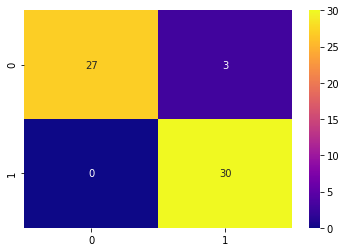

In [ ]:
sns.heatmap(cm, cmap='plasma', annot=True)